# ETL DATA PIPELINE NOTEBOOK

## **Convert all excel files in the local directory to CSV**

In [208]:
import pandas as pd
import os

def read_and_append_excel_files(directory):
    """
    Read the 'Data' tab of all Excel files in a specified directory 
    and append them into a single DataFrame without creating intermediate DataFrames.

    Parameters:
    directory (str): The path to the directory containing the Excel files.

    Returns:
    DataFrame: A single DataFrame containing the appended data from all the 'Data' tabs.
    """
    appended_df = pd.DataFrame()  # Start with an empty DataFrame

    try:
        # Iterate over all files in the directory
        for filename in os.listdir(directory):
            if filename.endswith('.xlsx') or filename.endswith('.xls'):
                file_path = os.path.join(directory, filename)
                try:
                    # Read the 'Data' sheet from the Excel file
                    df = pd.read_excel(file_path, sheet_name='Data')
                    # Append data to the existing DataFrame
                    appended_df = pd.concat([appended_df, df], ignore_index=True)
                    print(f"Read 'Data' from {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

    return appended_df

# Example usage:
directory = 'C:\\Data\\Projects\\ETL-Pipeline\\RawData'
appended_df = read_and_append_excel_files(directory)
appended_df.head(3)


Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2016.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2017.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2018.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2019.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2020.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2021.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2022.xlsx
Read 'Data' from C:\Data\Projects\ETL-Pipeline\RawData\ARG-FUEL-2023.xlsx


,Year & Month ID,Company ID (Seller),Legal ID,Company Name,Address,City,Province,Region,Product ID,Product Type,Shift ID,Shift Type,Price (Arg Pesos),Date,Flag Company ID,Flag Company,Latitude,Longitude
0,2016-06,3962,30-58829538-5,BASES SA,RUTA 22 KM 1266,CUTRAL CO,NEUQUEN,PATAGONIA,6,Compressed Natural Gas,1,Daytime,9.9,30/06/2016,1,BLANCA,-38.929930,-69.227440
1,2016-06,3962,30-58829538-5,BASES SA,RUTA 22 KM 1266,CUTRAL CO,NEUQUEN,PATAGONIA,6,Compressed Natural Gas,2,Nighttime,9.9,30/06/2016,1,BLANCA,-38.929930,-69.227440
2,2016-12,8220,30-71100517-6,FLUIDCONEX S.R.L,RUTA 5 ESQ. PORTEZUELO,LA RIOJA,LA RIOJA,NOA,6,Compressed Natural Gas,1,Daytime,12.0,20/12/2016,1,BLANCA,-29.406471,-66.833693


In [209]:
# Define a custom function for retrieving some information from the dataframe
def print_dataframe_info(data):
    if isinstance(data, pd.DataFrame):
        info = data.info()
        null = data.isna().sum()
        
        print(f"{info}")
        print(f"..........Null Count:........... ")
        print(f"{null}")
    else:
        print(f"Skipping non-DataFrame object: {data}")

# Use the function for appended_df DataFrame
print_dataframe_info(appended_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year & Month ID      37084 non-null  object 
 1   Company ID (Seller)  37084 non-null  int64  
 2   Legal ID             37084 non-null  object 
 3   Company Name         37084 non-null  object 
 4   Address              37084 non-null  object 
 5   City                 37084 non-null  object 
 6   Province             37084 non-null  object 
 7   Region               37084 non-null  object 
 8   Product ID           37084 non-null  int64  
 9   Product Type         37084 non-null  object 
 10  Shift ID             37084 non-null  int64  
 11  Shift Type           37084 non-null  object 
 12  Price (Arg Pesos)    37084 non-null  float64
 13  Date                 37084 non-null  object 
 14  Flag Company ID      37084 non-null  int64  
 15  Flag Company         37084 non-null 

In [210]:
import warnings
warnings.filterwarnings(action='ignore')

In [211]:
# Function to identify column types
def identify_and_clean(df):
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Handle missing values
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

    # Clean categorical columns
    for col in categorical_cols:
        df[col] = df[col].str.strip().str.lower()

    # Convert Date column if present
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') # Convert and handle invalid dates

    # Clean numerical columns
    for col in numerical_cols:
        # Convert non-numerical values to NaN and fill with mean
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())

    # Remove duplicates
    df = df.drop_duplicates()

    return df, categorical_cols, numerical_cols

In [212]:
# Apply the function 'identify_and_clean' on the appended_df DataFrame
df, categorical_cols, numerical_cols = identify_and_clean(appended_df)

In [213]:
df.head(2)

,Year & Month ID,Company ID (Seller),Legal ID,Company Name,Address,City,Province,Region,Product ID,Product Type,Shift ID,Shift Type,Price (Arg Pesos),Date,Flag Company ID,Flag Company,Latitude,Longitude
0,2016-06,3962,30-58829538-5,bases sa,ruta 22 km 1266,cutral co,neuquen,patagonia,6,compressed natural gas,1,daytime,9.9,2016-06-30,1,blanca,-38.92993,-69.22744
1,2016-06,3962,30-58829538-5,bases sa,ruta 22 km 1266,cutral co,neuquen,patagonia,6,compressed natural gas,2,nighttime,9.9,2016-06-30,1,blanca,-38.92993,-69.22744


In [214]:
categorical_cols

['Year & Month ID',
 'Legal ID',
 'Company Name',
 'Address',
 'City',
 'Province',
 'Region',
 'Product Type',
 'Shift Type',
 'Date',
 'Flag Company']

In [215]:
numerical_cols

['Company ID (Seller)',
 'Product ID',
 'Shift ID',
 'Price (Arg Pesos)',
 'Flag Company ID',
 'Latitude',
 'Longitude']

### Statistical Summary

In [311]:
# Create a copy of our DataFrame
stats_df = df.copy()

# Function to return descriptive statistics 
def descriptive_stats(df_stats):
    '''
    DataFrame to store the descriptive statistics for 
    each categorical and numerical column separately.
    '''
    categorical_stats = pd.DataFrame()
    numerical_stats = pd.DataFrame()
    '''
    Using for loops for generating descriptive statistics for categorical and numerical columns, 
    We can iterate over the columns based on their data types.
    '''
    # Descriptive statistics for categorical columns
    for cols in df_stats.select_dtypes(include = 'object').columns:
        categorical_stats[cols] = df_stats[cols].describe()

    # Descriptive statistics for numerical columns
    for cols in df_stats.select_dtypes(include = ['number']).columns:
        numerical_stats[cols] = df_stats[cols].describe()
    
    return categorical_stats,numerical_stats

# Apply the descriptive_stats function to the stats_df
categorical_stats,numerical_stats = descriptive_stats(stats_df) 
# In the above, we replace the df_stats from the function with the copy of our df i.e,. stats_df

In [313]:
# Categorical stats
categorical_stats.T

,count,unique,top,freq
Year & Month ID,37084,81,2023-10,28705
Legal ID,37084,3192,30-67877449-5,1352
Company Name,37084,3550,automovil club argentino,1082
Address,37076,4677,hipolito yrigoyen 2550,20
City,37084,1080,capital federal,1688
Province,37084,24,buenos aires,13811
Region,37084,6,pampeana,15457
Product Type,37084,5,gasoil grade 2,8501
Shift Type,37084,2,daytime,18542
Flag Company,37084,11,ypf,13556


In [315]:
# Numerical stats
round(numerical_stats.T,0)

,count,mean,std,min,25%,50%,75%,max
Company ID (Seller),37084.0,5293.0,3291.0,104.0,2195.0,5321.0,8182.0,10898.0
Product ID,37084.0,11.0,8.0,2.0,3.0,6.0,19.0,21.0
Shift ID,37084.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
Price (Arg Pesos),37084.0,322.0,110.0,7.0,290.0,339.0,397.0,750.0
Flag Company ID,37084.0,9.0,11.0,-1.0,2.0,4.0,26.0,30.0
Latitude,37084.0,-33.0,4.0,-55.0,-35.0,-34.0,-31.0,-22.0
Longitude,37084.0,-62.0,4.0,-72.0,-64.0,-61.0,-59.0,-54.0


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### **Numerical data**

##### **Histogram and Box Plots**

In [321]:
df_eda = df.copy()

In [377]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_eda is your DataFrame and contains the data you want to plot

def box_hist_plot(num_cols):
    """
    This function creates a combined histogram and boxplot for a given feature.

    Args:
        num_cols (str): The name of the feature to plot.

    Returns:
        None
    """
    plt.rcParams['axes.facecolor'] = '#edf2f4'
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(df_eda[num_cols], kde=True, color='#6096ba', ax=axes[0])

    # Calculate descriptive statistics
    mean_value = df_eda[num_cols].mean()
    median_value = df_eda[num_cols].median()
    mode_value = df_eda[num_cols].mode().values[0]
    std_value = df_eda[num_cols].std()
    min_value = df_eda[num_cols].min()
    max_value = df_eda[num_cols].max()

    # Add vertical lines for statistics on the histogram
    axes[0].axvline(mean_value, color='#294c60', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='#0582ca', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='#e78f8e', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='#1282a2', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='#1282a2', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='#acd8aa', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='#acd8aa', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    # Set labels and title for the histogram
    axes[0].set_title(f"Histogram of {num_cols}")
    axes[0].set_xlabel(num_cols)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Create box plot
    sns.boxplot(x=df_eda[num_cols], ax=axes[1], color='#6096ba')

    # Add vertical lines for statistics on the box plot (optional)
    axes[1].axvline(mean_value, color='#294c60', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='#0582ca', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='#e78f8e', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='#1282a2', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='#1282a2', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='#acd8aa', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='#acd8aa', linestyle='--', linewidth=2)

    # Set labels and title for the box plot
    axes[1].set_title(f"Box Plot of {num_cols}")
    axes[1].set_xlabel(num_cols)

    plt.tight_layout()
    plt.show()

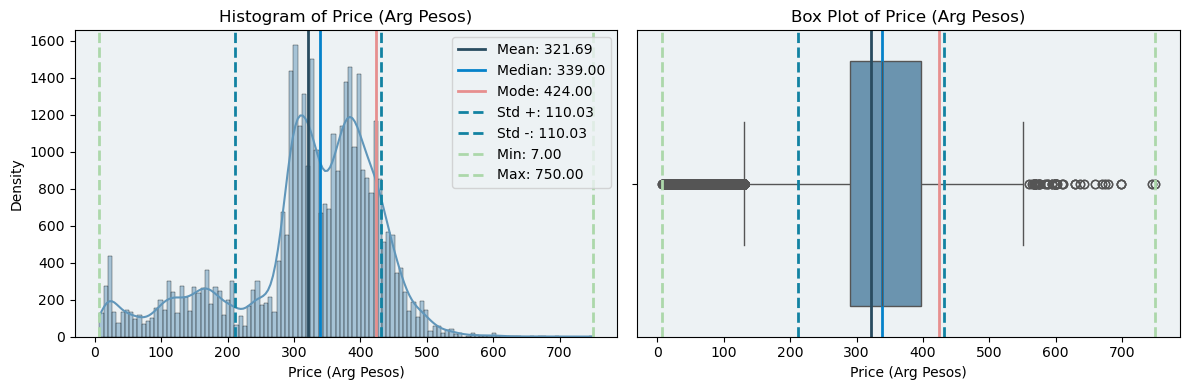

In [498]:
# Applying the function to 'Price (Arg Pesos)' variable in our df
box_hist_plot('Price (Arg Pesos)')

##### **Check for outliers** 

In [454]:
df_outliers = df.copy()

In [456]:
# Find outliers using IQR method
def find_outliers(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (df1 < lower_bound) | (df1 > upper_bound)
    outliers = df1[outlier_condition]

    return outliers, lower_bound, upper_bound

In [458]:
# Outliers of Price variable
price_outliers, price_lower_bound, price_upper_bound = find_outliers(df_outliers['Price (Arg Pesos)'])

print(f"Lower Bound: {price_lower_bound}")
print(f"Upper Bound: {price_upper_bound}")
print(f"Outliers: {len(price_outliers)}")

Lower Bound: 130.75
Upper Bound: 556.75
Outliers: 3399


##### **Skewness**

In [461]:
df_skewness = df.copy()

In [463]:
# Function to identify weither the distribution of our data is left or right skewed
def skewness_dist(df2, var):
    skewness = df2[var].skew()

    print(f"Skewness of the {var} variable: {skewness:.3f}")

    if skewness > 0:
        print(f"The distribution is right skewed since {skewness:.3f} is positive")
    elif skewness < 0:
        print(f"The distribution is left skewed since {skewness:.3f} is negative")
    else:
        print(f"The distribution is approximately symmetric")

In [465]:
# Apply the `skewness_dist` function to the `Price (Arg Pesos)` variable.
Price_skewness = skewness_dist(df_skewness,'Price (Arg Pesos)')

Skewness of the Price (Arg Pesos) variable: -0.977
The distribution is left skewed since -0.977 is negative


#### **Categorical data**

In [476]:
cate_df = df.copy()

In [494]:
# Function to plot bar and donut chart
'''
Suppose we have a DataFrame `data`, then for any categorical variable
`var` in `data` the following function can apply:
'''

def bar_donut_chart(data, var):
    colors = ['#277da1', '#577590', '#4d908e', '#aec3b0', '#90be6d','#2d6a4f']

    category_counts = data[var].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Bar chart
    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{var} Distribution', fontsize=14)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{var} Categories')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, 
                    '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    # Donut chart
    wedges, texts, autotexts = axs[1].pie(category_counts, 
                                          labels=category_counts.index,
                                          colors=colors, autopct='%1.1f%%',
                                          startangle=120)
    centre_circle = plt.Circle((0,0),0.70, fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()


Bar chart and Donut chart for Region


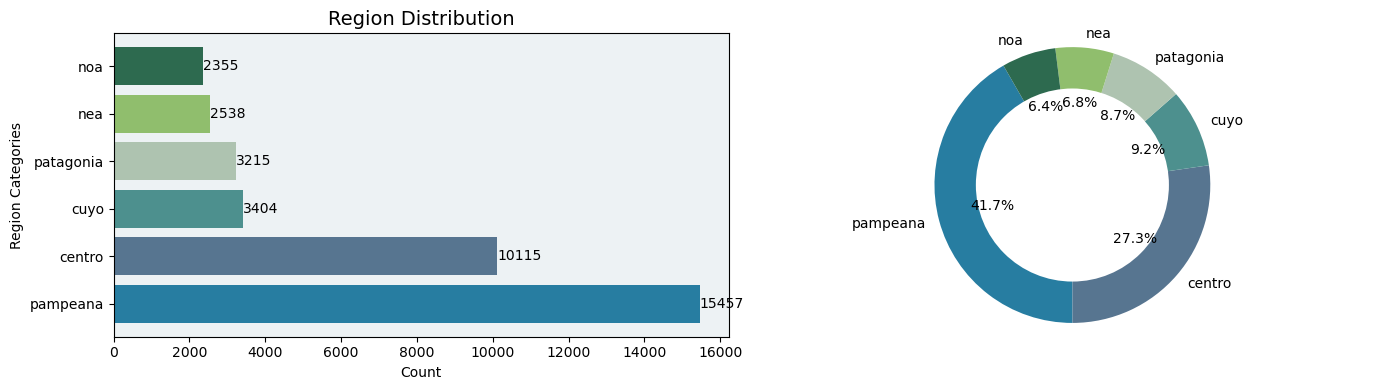

Bar chart and Donut chart for Product Type


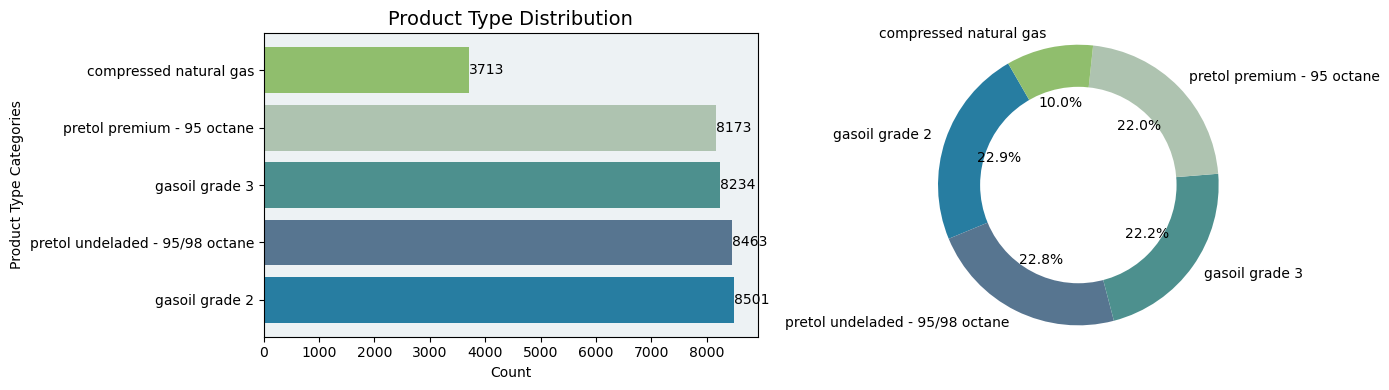

Bar chart and Donut chart for Shift Type


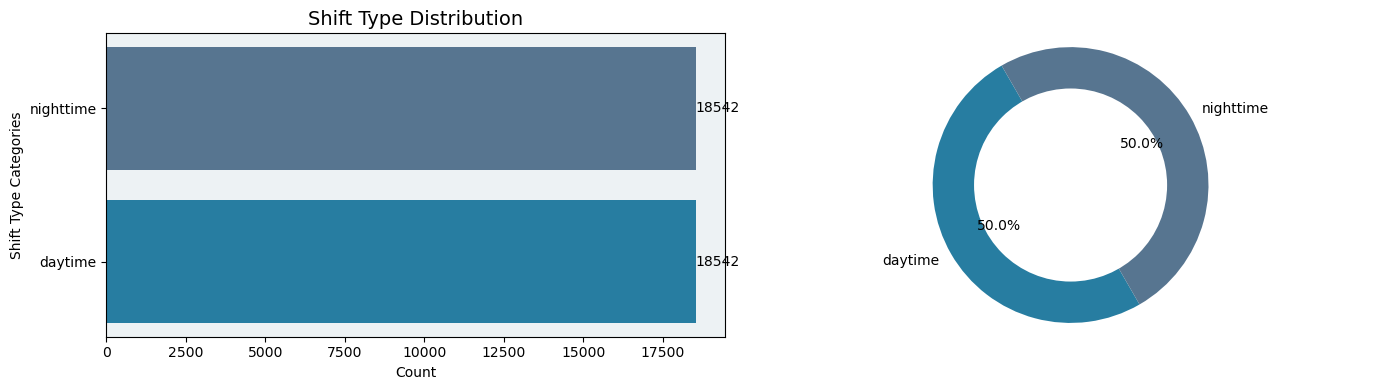

In [496]:
# Apply the above logic to all the categorical variables
for i in ['Region', 'Product Type', 'Shift Type']:
    print(f'Bar chart and Donut chart for {i}')
    bar_donut_chart(cate_df,i)

### Bivariate Analysis (Categorical vs. Numerical)

In [515]:
bivariate_df = df.copy()

In [539]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_pie_dist_charts(data, num_col, cate_cols):
    colors = ['#277da1', '#577590', '#4d908e', '#aec3b0', '#90be6d','#2d6a4f']

    for var in cate_cols:
        grouped_data = data.groupby(var)[num_col].mean()
        category_counts = data[var].value_counts()

        fig, axs = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

        # Bar chart
        bars = axs[0, 0].bar(grouped_data.index, grouped_data.values, color=colors[:len(grouped_data)])
        axs[0, 0].set_title(f'{var} vs {num_col}')
        axs[0, 0].tick_params(axis='x', rotation=60)

        for bar in bars:
            axs[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                           f'{bar.get_height():.2f}', ha='center', va='bottom')

        # Pie chart
        axs[0, 1].pie(category_counts, labels=category_counts.index, colors=colors[:len(category_counts)], 
                      autopct='%1.1f%%', startangle=140)
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        axs[0, 1].add_artist(centre_circle)
        axs[0, 1].axis('equal')
        axs[0, 1].set_title(f'{var} Distribution')

        # Distribution plot
        sns.kdeplot(data=data, x=num_col, hue=var, ax=axs[1, 0], fill=True, palette=colors[:len(category_counts)])
        axs[1, 0].set_title(f'Distribution of {num_col} by {var}')

        axs[1, 1].axis('off')  # Hide the unused subplot

        plt.tight_layout()
        plt.show()

**Let us analyse the distribution of Price per shift**

Bar chart of Region Vs. Price, Price share and dist of Price across all the Region variables


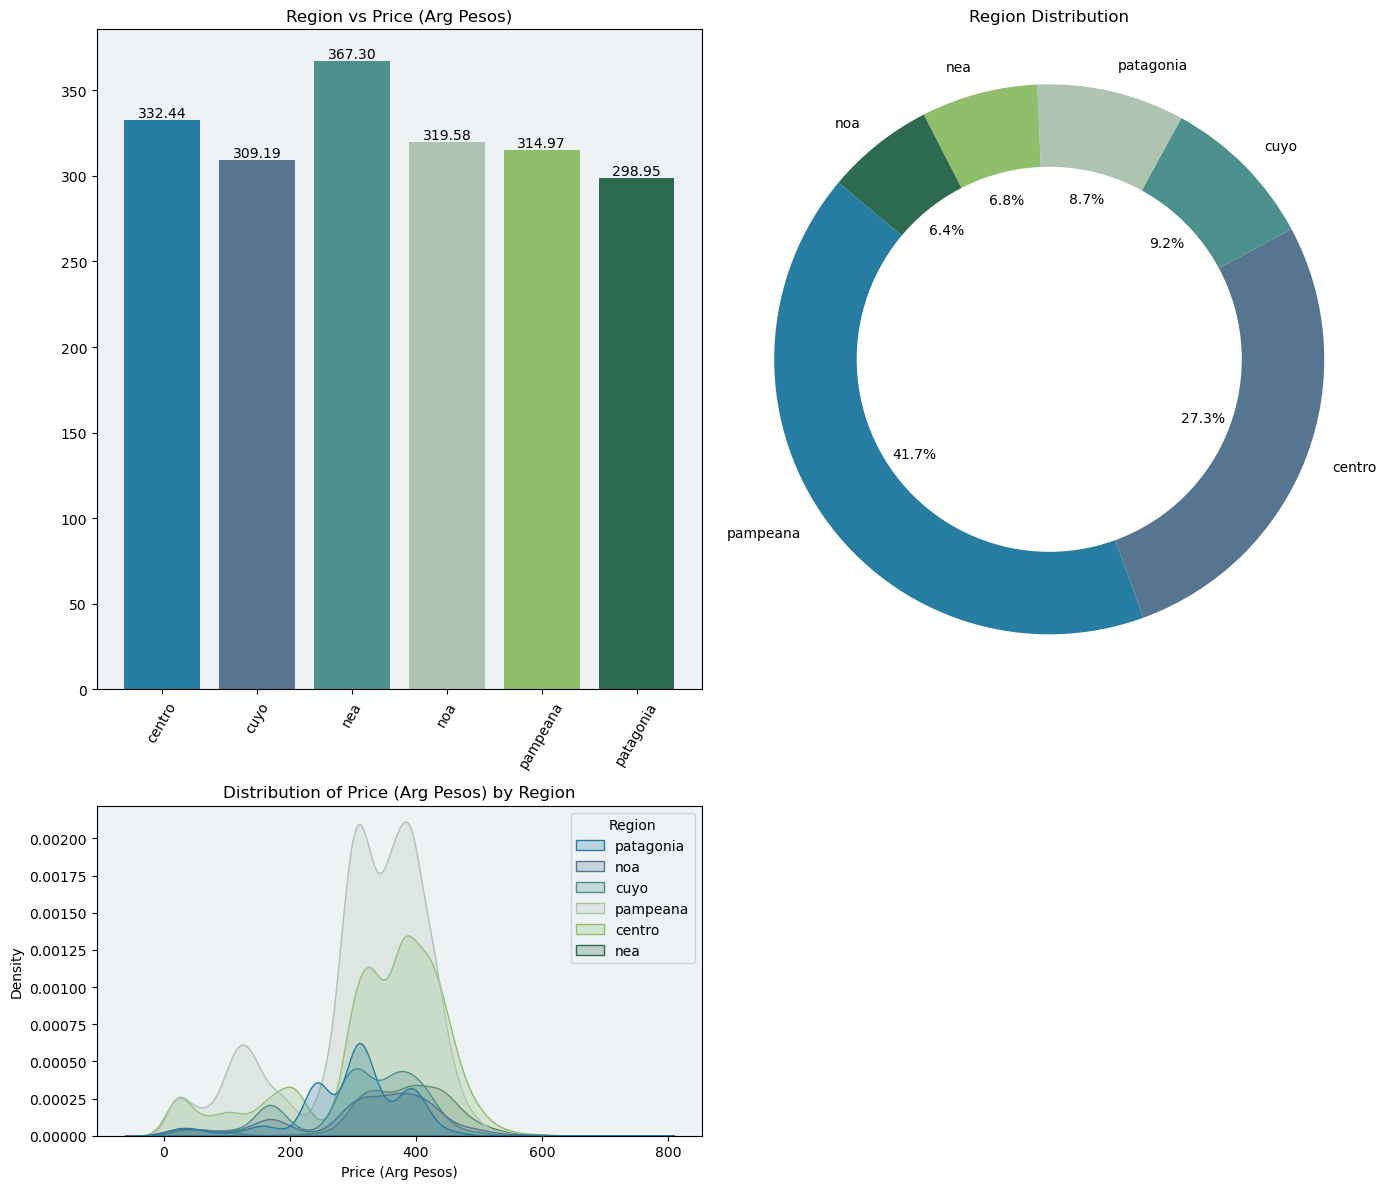

Bar chart of Product Type Vs. Price, Price share and dist of Price across all the Product Type variables


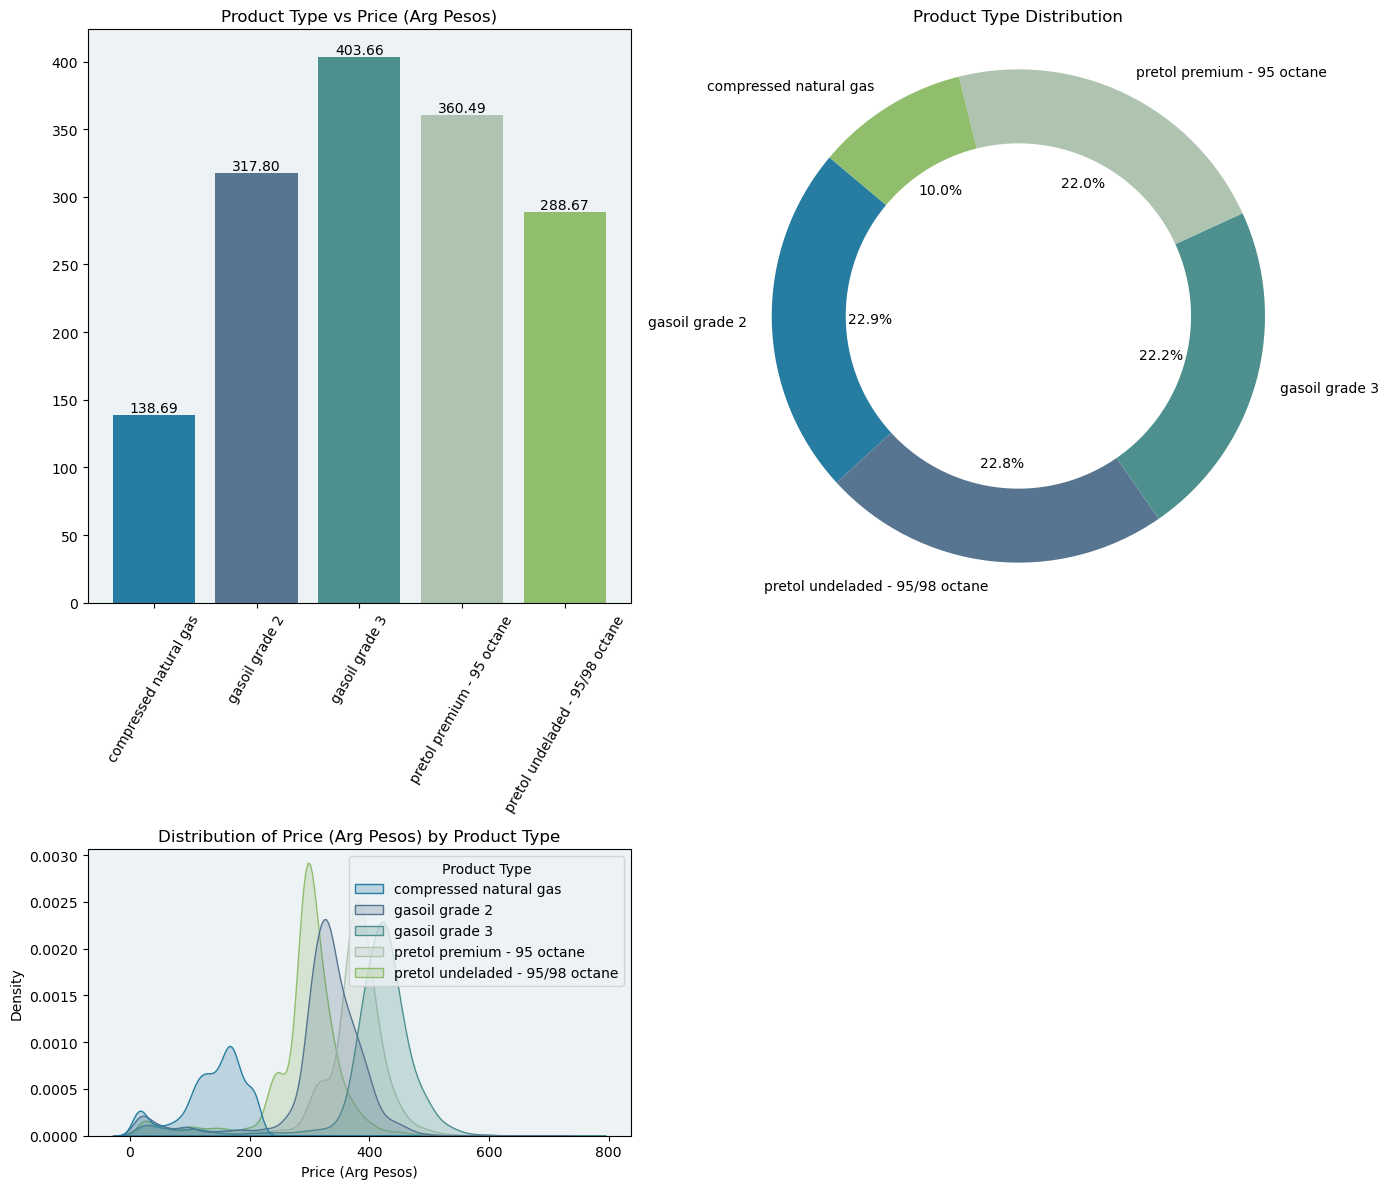

Bar chart of Shift Type Vs. Price, Price share and dist of Price across all the Shift Type variables


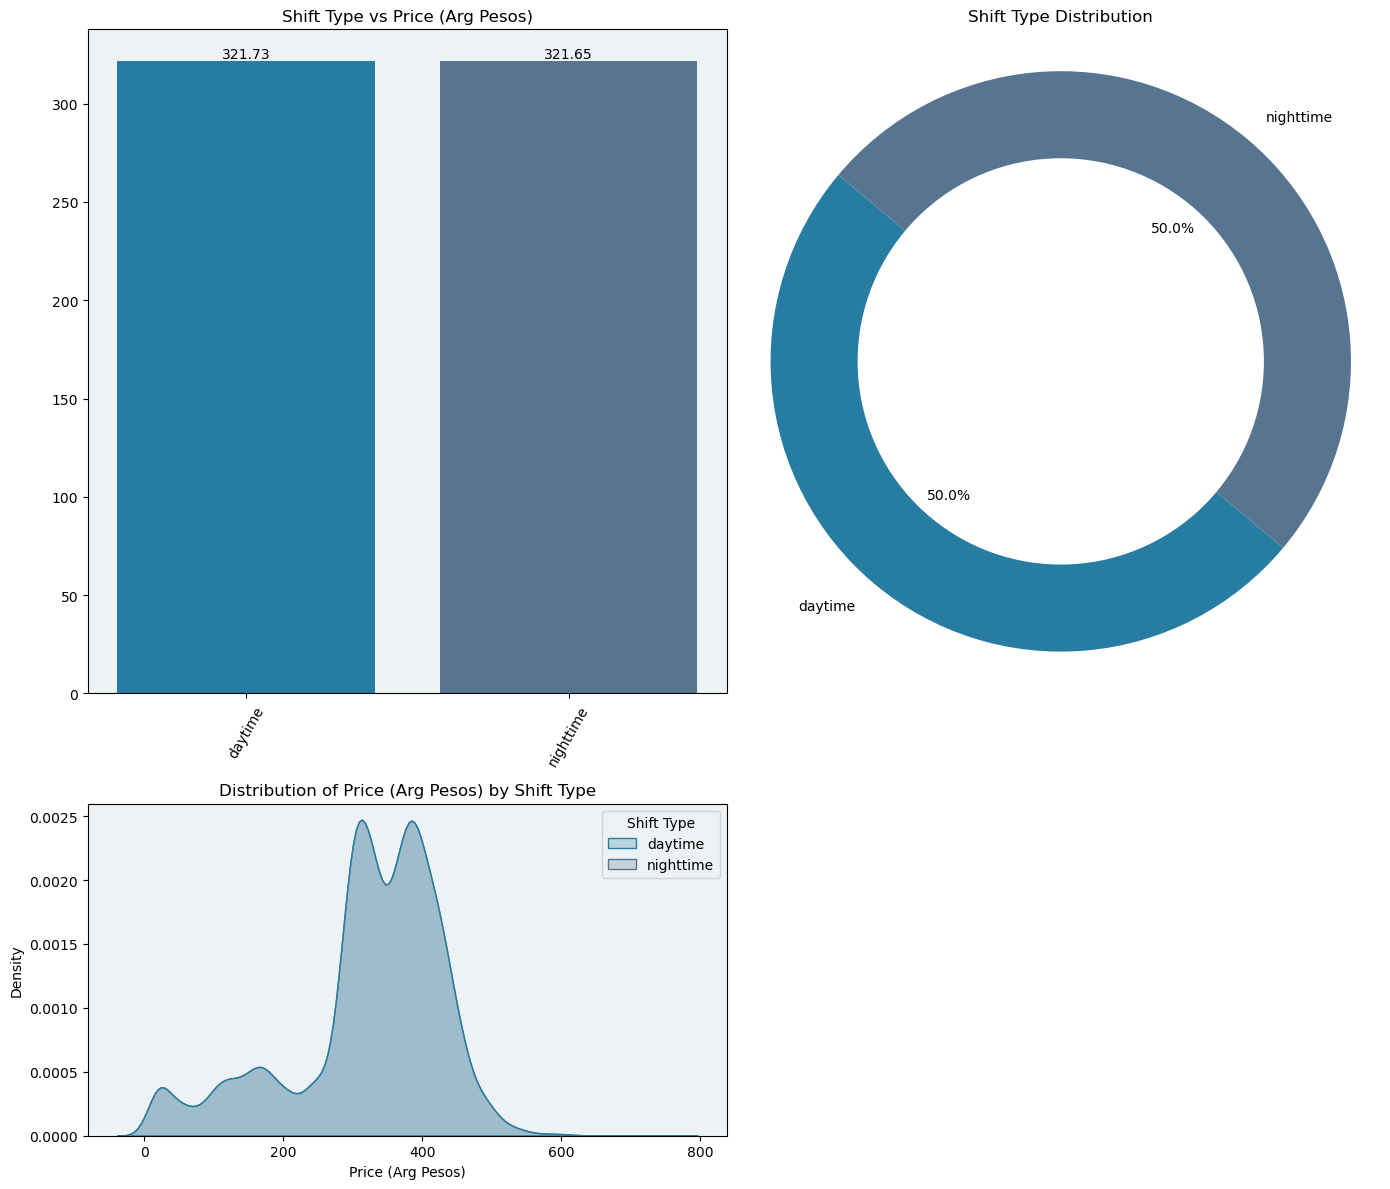

In [546]:
# Apply the function to the some of the selected categorical variables and price 
for col in ['Region', 'Product Type', 'Shift Type']:
    print(f'Bar chart of {col} Vs. Price, Price share and dist of Price across all the {col} variables')
    plot_bar_pie_dist_charts(bivariate_df, 'Price (Arg Pesos)', [col])
